In [58]:
from pathlib import Path

from sed import SedProcessor
import sed
import numpy as np

%matplotlib inline
# %matplotlib ipympl
import matplotlib.pyplot as plt

In [59]:
%matplotlib widget

In [60]:
config_file = Path(sed.__file__).parent.parent/'tutorial/hextof_config.yaml'
assert config_file.exists()

# Loading Data

In [61]:
config={"core": {"paths": {"data_raw_dir": "../../flash_test_data/fl1user3/", "data_parquet_dir": "../../flash_test_data/parquet/"}}}
sp = SedProcessor(runs=[44638], config=config, user_config=config_file, system_config={}, collect_metadata=False)

Folder config loaded from: [/mnt/pcshare/users/Laurenz/AreaB/sed/sed/tutorial/sed_config.yaml]
User config loaded from: [/mnt/pcshare/users/Laurenz/AreaB/sed/sed/tutorial/hextof_config.yaml]
Default config loaded from: [/mnt/pcshare/users/Laurenz/AreaB/sed/sed/sed/config/default.yaml]
Reading files: 0 new files of 3 total.
All files converted successfully!
Filling nan values...
loading complete  in 0.05 s


In [62]:
sp.add_jitter()
sp.align_dld_sectors()

Aligning 8s sectors of dataframe


# Energy Calibration

## using lmfit

In [63]:
axes = ['sampleBias', 'dldTimeSteps']
bins = [6, 500]
ranges = [[0,6], [4000, 8000]]
res = sp.compute(bins=bins, axes=axes, ranges=ranges)

  0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
sp.load_bias_series(binned_data=res)

interactive(children=(IntSlider(value=3, description='refid', max=10), IntRangeSlider(value=(5500, 6000), desc…

Button(description='apply', style=ButtonStyle())

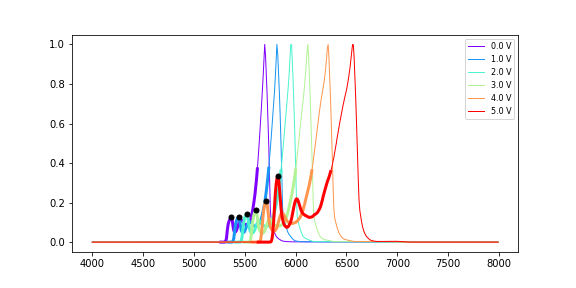

In [65]:
ranges=(5500, 6000)
ref_id=3
sp.find_bias_peaks(ranges=ranges, ref_id=ref_id)

In [66]:
sp.append_tof_ns_axis()

Adding time-of-flight column in nanoseconds to dataframe:


In [67]:
sp.dataframe.head()

,trainId,pulseId,electronId,timeStamp,dldPosX,dldPosY,dldTimeSteps,cryoTemperature,crystalVoltage,dldTimeBinSize,...,sampleBias,sampleTemperature,tofVoltage,pulserSignAdc,monochromatorPhotonEnergy,gmdBda,bam,delayStage,dldSectorID,dldTime
0,1640388889,3,0,1.678800e+09,623.785094,649.785094,5710.785156,301.76001,-0.001524,0.020576,...,0.001856,302.73999,9.9989,35014.0,NaN,NaN,-846.53125,NaN,1,3760.187814
1,1640388889,3,1,1.678800e+09,625.367363,647.367363,5711.367188,301.76001,-0.001524,0.020576,...,0.001856,302.73999,9.9989,35014.0,NaN,NaN,-846.53125,NaN,4,3760.571044
2,1640388889,4,0,1.678800e+09,684.003223,663.003223,5726.003418,301.76001,-0.001524,0.020576,...,0.001856,302.73999,9.9989,35023.0,NaN,NaN,-846.09375,NaN,1,3770.208068
3,1640388889,4,1,1.678800e+09,684.512967,679.512967,5724.513184,301.76001,-0.001524,0.020576,...,0.001856,302.73999,9.9989,35023.0,NaN,NaN,-846.09375,NaN,0,3769.226844
4,1640388889,4,2,1.678800e+09,685.691489,661.691489,5721.691406,301.76001,-0.001524,0.020576,...,0.001856,302.73999,9.9989,35023.0,NaN,NaN,-846.09375,NaN,7,3767.368884


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 6
    # variables        = 3
    chi-square         = 17.5000000
    reduced chi-square = 5.83333333
    Akaike info crit   = 12.4226485
    Bayesian info crit = 11.7979269
##  Warning: uncertainties could not be estimated:
    d:   at initial value
    t0:  at initial value
[[Variables]]
    d:   1.00000000 (init = 1)
    t0:  1.0000e-06 (init = 1e-06)
    E0: -2.50000000 (init = -5)
Quality of Calibration:


E/TOF relationship:


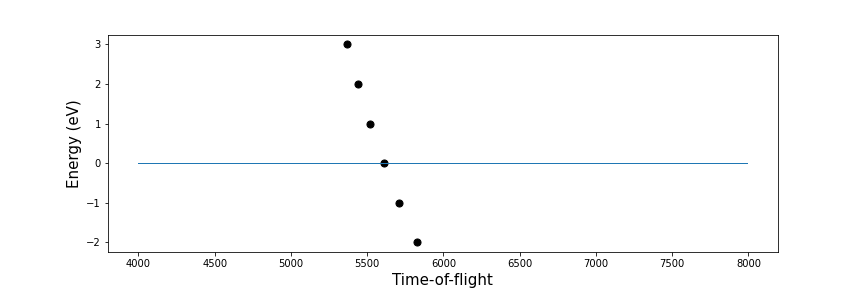

In [68]:
ref_id=3
ref_energy=0
sp.calibrate_energy_axis(
    ref_id=ref_id,
    ref_energy=ref_energy,
    method="lmfit",
    energy_scale='kinetic',
)

In [ ]:
ref_id=3
ref_energy=0
sp.calibrate_energy_axis(
    ref_id=ref_id,
    ref_energy=ref_energy,
    method="lmfit",
    energy_scale='kinetic',
    d={'value':1, 'min': 1, 'max': 1},
    E0={'value':0, 'min': -100, 'max': 100,'vary':True},
    t0={'value':225, 'min': -100, 'max': 250, 'vary':True},
)

In [ ]:
sp.append_energy_axis()

In [ ]:
sp.append_tof_ns_axis()

In [ ]:
sp.dataframe[['dldTime','dldTimeSteps','energy','dldSectorID']].head()

In [ ]:
axes = ['sampleBias', 'energy']
bins = [5, 500]
ranges = [[28,33], [-10,10]]
res = sp.compute(bins=bins, axes=axes, ranges=ranges)

In [ ]:
plt.figure()
res.mean('sampleBias').plot.line(x='energy',linewidth=3);
res.plot.line(x='energy',linewidth=1,alpha=.5,label='all');


In [ ]:
sp.apply_energy_offset(
    constant=-31.5,
    columns=['sampleBias'],
    signs=[+1],
)

In [ ]:
axes = ['sampleBias', 'energy']
bins = [5, 500]
ranges = [[28,33], [-3,2]]
res_fit = sp.compute(bins=bins, axes=axes, ranges=ranges)

In [ ]:
plt.figure()
ax = plt.subplot(111)
res_fit.energy.attrs['unit'] = 'eV'
res_fit.mean('sampleBias').plot.line(x='energy',linewidth=3, ax=ax);
res_fit.plot.line(x='energy',linewidth=1,alpha=.5,label='all',ax=ax);

## with poly fit

In [ ]:
sp = SedProcessor(runs=[44797], config=config_file, collect_metadata=False)

In [ ]:
sp.add_jitter()
sp.align_dld_sectors()

In [ ]:
axes = ['sampleBias', 'dldTimeSteps']
bins = [6, 500]
ranges = [[28,33], [4000, 4800]]
res = sp.compute(bins=bins, axes=axes, ranges=ranges)

In [ ]:
sp.load_bias_series(binned_data=res)

In [ ]:
ranges=(4250, 4500)
ref_id=3
sp.find_bias_peaks(ranges=ranges, ref_id=ref_id)

In [ ]:
ref_id=3
ref_energy=-0.3
sp.calibrate_energy_axis(
    ref_id=ref_id,
    ref_energy=-0.3,
    method="lstsq",
    order=2,
)

In [ ]:
sp.append_energy_axis()

In [ ]:
axes = ['sampleBias', 'energy']
bins = [5, 500]
ranges = [[28,33], [-10,10]]
res = sp.compute(bins=bins, axes=axes, ranges=ranges)

In [ ]:
plt.figure()
res.mean('sampleBias').plot.line(x='energy',linewidth=3);
res.plot.line(x='energy',linewidth=1,alpha=.5,label='all');


In [ ]:
sp.apply_energy_offset(
    constant=-31.5,
    columns=['sampleBias'],
    signs=[+1],
)

In [ ]:
axes = ['sampleBias', 'energy']
bins = [5, 500]
ranges = [[28,33], [-3,2]]
res_poly = sp.compute(bins=bins, axes=axes, ranges=ranges)

In [ ]:
plt.figure()
ax = plt.subplot(111)
res_poly.energy.attrs['unit'] = 'eV'
res_poly.mean('sampleBias').plot.line(x='energy',linewidth=3, ax=ax);
res_poly.plot.line(x='energy',linewidth=1,alpha=.5,label='all',ax=ax);

# From manual values
these are obviously not the right values, I think I got them from an other calibraiton file.
They are here to show how the calibration works.
Also, I noticed the parameter energy_scale from the config has no effect...

In [ ]:
sp = SedProcessor(runs=[44797], config=config_file, collect_metadata=False)

In [ ]:
sp.add_jitter()
sp.align_dld_sectors()

In [ ]:
sp.append_energy_axis()

In [ ]:
sp.apply_energy_offset(
    constant=+31.5,
    columns=['sampleBias'],
    signs=[-1],
)

In [ ]:
axes = ['sampleBias', 'energy']
bins = [5, 500]
ranges = [[28,33], [-10,5]]
res_config = sp.compute(bins=bins, axes=axes, ranges=ranges)

In [ ]:
plt.figure()
ax = plt.subplot(111)
res_config.energy.attrs['unit'] = 'eV'
res_config.mean('sampleBias').plot.line(x='energy',linewidth=3, ax=ax);
res_config.plot.line(x='energy',linewidth=1,alpha=.5,label='all',ax=ax);

In [ ]:
sp.dataframe['energy'] = - sp.dataframe['energy']

In [ ]:
axes = ['sampleBias', 'energy']
bins = [5, 500]
ranges = [[28,33], [-3,2]]
res_config = sp.compute(bins=bins, axes=axes, ranges=ranges)

In [ ]:
plt.figure()
ax = plt.subplot(111)
res_config.energy.attrs['unit'] = 'eV'
res_config.mean('sampleBias').plot.line(x='energy',linewidth=3, ax=ax);
res_config.plot.line(x='energy',linewidth=1,alpha=.5,label='all',ax=ax);

In [ ]:
# compare the two methods
fig, ax = plt.subplots(1,3, figsize=(10,4), layout='constrained')
res_poly.energy.attrs['unit'] = 'eV'
res_poly.mean('sampleBias').plot.line(x='energy',linewidth=3, ax=ax[0], label='all');
res_poly.plot.line(x='energy',linewidth=1,alpha=.5,ax=ax[0]);
ax[0].set_title('poly')
res_fit.energy.attrs['unit'] = 'eV'
res_fit.mean('sampleBias').plot.line(x='energy',linewidth=3, ax=ax[1], label='all');
res_fit.plot.line(x='energy',linewidth=1,alpha=.5,ax=ax[1]);
ax[1].set_title('fit')
res_config.energy.attrs['unit'] = 'eV'
res_config.mean('sampleBias').plot.line(x='energy',linewidth=3, ax=ax[2]);
res_config.plot.line(x='energy',linewidth=1,alpha=.5,label='all',ax=ax[2]);
ax[2].set_title('config')
ax[0].set_xlim(-2, 1.5)
ax[1].set_xlim(-2, 1.5)
ax[2].set_xlim(-2, 1.5)